# Regressão

## Definição

**Regressão** é uma equação que permite estimar o valor esperado de uma variável $y$ dados valores de entrada de outras variáveis.

Regressão de forma geral, tem como premissa estimar um valor que não é dado inicialmente.

Modelos de regressão são frequentemente ajustados usando a abordagem dos mínimos quadrados.

## O que devemos responder com um modelo de regressão?

- Existe uma relação matemática entre as variáveis conhecidas?
- Se positivo, como posso medir qual é essa relação?
- Posso utilizar desta relação para prever valores?

## Correlação entre variáveis

- Mostra o módulo e direção da relação entre variáveis
- É um valor que respeita o intervalo de $-1 \le x \le 1$
- A correlação entre uma variável A para uma variável B é a mesma que da variável B para a variável A

## r²

- Mostra o quanto consegue explicar o modelo de regressão
- Quanto maior o valor de $r^2$, maior é seu poder explicativo
- Este valor está em um intervalo entre $0 \le x \le 1$

Por exemplo, temos um valor de $r^2$ de $0,75$, isso quer dizer que 75% de nossa variável dependente pode ser explicada pelas variáveis utilizadas no modelo.

## Coeficiente de Determinação

[![Alt text](https://img.youtube.com/vi/6LBTmVv3K_Q/0.jpg)](https://www.youtube.com/watch?v=6LBTmVv3K_Q)

## Como a função de regressão é construída?

![title](./imgs/f5.jpg)

- Há um ponto onde a linha da função faz intersecção com o eixo X, este valor chamamos de $\alpha$
- Calculamos por meios matemáticos a inclinação da reta dado por $\beta$
- Existe um erro $\varepsilon$ que deve ser considerado na equação

![title](./imgs/f6.png)

## Regressão simples

- Apenas uma variável explanatória $x$ é utilizada para prever uma variável dependente $y$.

Tem equação respeitando o modelo:

$$
y = \alpha + \beta x + \varepsilon
$$

## Regressão múltipla

- Duas ou mais variáveis explanatórias $x_1, x_2, \ldots, x_n$ para prever uma variável dependente $y$.

Tem equação respeitando o modelo:

$$
y = \alpha + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \varepsilon
$$

Quando colocamos mais variáveis no modelo, o valor de $r^2$ tende a aumentar, mesmo que não aumente a acurácia do modelo. Para isso, utiliza-se $r²$ ajustado, para ajustar a variação do modelo levando em consideração o número de variáveis independentes. O valor de $r²$ ajustado sempre é menor que o valor de $r²$.

## Pontos de atenção

- Verificar a colinearidade entre variáveis (duas variáveis independentes que são correlacionadas)
    - Variáveis colineares independentes podem prejudicar o modelo
- Colocar apenas variáveis capazes de explicar o problema


## Requisitos básicos

- Linearidade entre a variável dependente e as variáveis independentes
- Variáveis normalmente distribuídas
- Baixa ou nenhuma colinearidade entre as variáveis do modelo

## Exemplo de implementação de um modelo de Regressão Linear

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Utilizaremos o dataset "diabetes"
diabetes = datasets.load_diabetes()

In [5]:
# Escolhemos utilizar apenas uma variável independente
diabetes_X = diabetes.data[:, np.newaxis, 2]

In [9]:
# Vamos separar entre treino e teste
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [7]:
# Criamos um objeto contendo nosso modelo
regr = linear_model.LinearRegression()

In [10]:
# Treinamos o modelo utilizando nossa base de treino
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
# Vamos prever os valores em nossa base de teste
diabetes_y_pred = regr.predict(diabetes_X_test)

In [21]:
# O ponto de intersecção da nossa função
print('Intersecção: \n', regr.intercept_)
# Os coeficientes da nossa função
print('Coeficientes: \n', regr.coef_)
# O erro quadrático médio
print("Erro quadrático médio: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Variância explicativa r2
print('r²: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Intersecção: 
 152.91886182616167
Coeficientes: 
 [938.23786125]
Erro quadrático médio: 2548.07
r²: 0.47


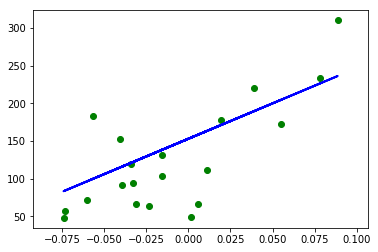

In [17]:
# Plot
plt.scatter(diabetes_X_test, diabetes_y_test,  color = 'green')
plt.plot(diabetes_X_test, diabetes_y_pred, color = 'blue', linewidth = 2)

plt.show()

## Exercícios

Os exercícios propostos deverão ser resolvidos utilizando a base fornecida. Vamos utilizar um modelo "pesado", porém o que existe de mais atual em termos de regressão. 

Por este motivo, é aconselhado que os exercícios sejam realizados utilizando a plataforma fornecida.

### 1. Regressão Linear

### 2. Random Forest

### 3. XGBoost

### 4. MLP

## Desafio

Utilizando as técnicas acima, tente resolver o desafio proposto neste [notebook]().